In [0]:
#thank you for teaching me QuantEcon.org
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

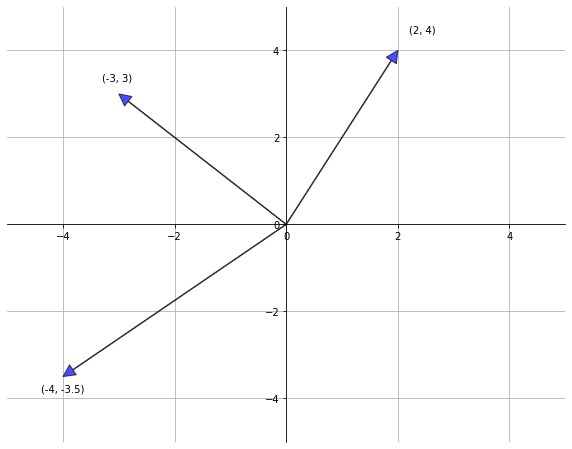

In [0]:
fig, ax = plt.subplots(figsize=(10,8)) #membuat background grafik
for spine in ['left', 'bottom']:#membuat axis untuk kiri dan bawah
  ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:#untuk kanan dan atas
  ax.spines[spine].set_color('none')

ax.set(xlim=(-5,5), ylim=(-5,5))#untuk menentukan axis limit -5 sampai 5
ax.grid()
vecs = ((2,4), (-3,3), (-4, -3.5)) #untuk vector
for v in vecs:# untuk buat panah
  ax.annotate('', xy=v, xytext=(0,0),
              arrowprops=dict(facecolor='blue',
                              shrink=0,
                              alpha=0.7,
                              width=0.5))
  ax.text(1.1 * v[0], 1.1 *v[1], str(v))
plt.show()#untuk menunjukan hasil


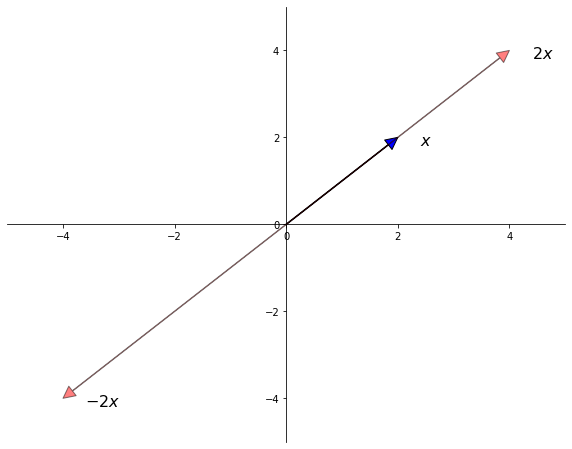

In [0]:
fig, ax =plt.subplots(figsize=(10,8))
for spine in ['left', 'bottom']:
  ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
  ax.spines[spine].set_color('none')

ax.set(xlim=(-5,5), ylim=(-5,5))
x=(2,2)
ax.annotate('', xy=x, xytext=(0,0),
            arrowprops=dict(facecolor='blue',
                            shrink=0,
                            alpha=1,
                            width=0.5))
ax.text(x[0]+ 0.4, x[1]-0.2, '$x$', fontsize='16')

scalars=(-2,2)
x= np.array(x)
for s in scalars:
  v=s*x
  ax.annotate('', xy=v, xytext=(0,0),
              arrowprops=dict(facecolor='red',
                              shrink=0,
                              alpha=0.5,
                              width=0.5))
  ax.text(v[0]+0.4,v[1]-0.2, f'${s} x$', fontsize='16')
  plt.show

In [0]:
x=np.ones(3)
y= np.array((2,4,6))
x+y

array([3., 5., 7.])

In [0]:
#Inner Product
np.sum(x*y)

12.0

In [0]:
#norm
np.sqrt(np.sum(x**2))

1.7320508075688772

In [0]:
#norm otherway
np.linalg.norm(x)

1.7320508075688772

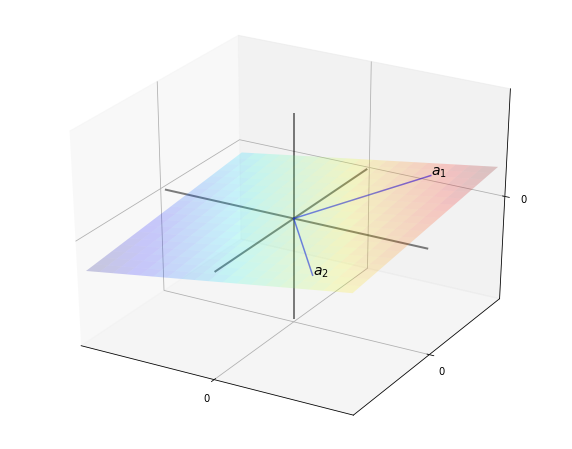

In [0]:
#Span
fig=plt.figure(figsize=(10,8))
ax=fig.gca(projection='3d')
x_min, x_max = -5,5

alfa, beta=0.2, 0.1

ax.set(xlim=(x_min,x_max), ylim=(x_min,x_max), zlim=(x_min,x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))
gs=3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)

def f(x,y):
  return alfa *x +beta*y

x_coords= np.array((3,3))
y_coords= np.array((4,-4))
z=f(x_coords,y_coords)
for i in (0,1):
  ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

for i in (0,1):
  x=(0, x_coords[i])
  y=(0, y_coords[i])
  z=(0, f(x_coords[i], y_coords[i]))
  ax.plot(x,y,z, 'b-', lw=1.5, alpha=0.6)

grid_size=20
xr2=np.linspace(x_min, x_max, grid_size)
yr2=np.linspace(x_min, x_max, grid_size)
x2,y2=np.meshgrid(xr2,yr2)
z2=f(x2, y2)
ax.plot_surface(x2,y2,z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()



In [0]:
A=((1,2),
   (3,4))
type(A)

tuple

In [0]:
A= np.array(A)
type(A)

numpy.ndarray

In [0]:
A.shape

(2, 2)

In [0]:
A= np.identity(3)
B= np.ones((3,3))
2*A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [0]:
A+B
A@B

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

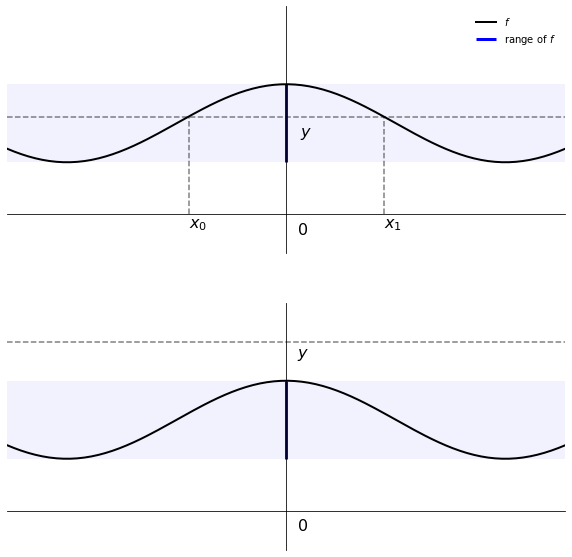

In [0]:
def f(x):
    return 0.6 * np.cos(4 * x) + 1.4


xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for ax in axes:
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax),
           yticks=(), xticks=())

    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]

ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f'$x_{i}$', fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)

plt.show()

In [0]:
A=((1,2), (3,4))
A=np.array(A)
y=np.ones((2,1))
det(A)

-2.0

In [0]:
A_inv =inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [0]:
x=A_inv @ y
A@x

array([[1.],
       [1.]])

In [0]:
solve(A, y)

array([[-1.],
       [ 1.]])

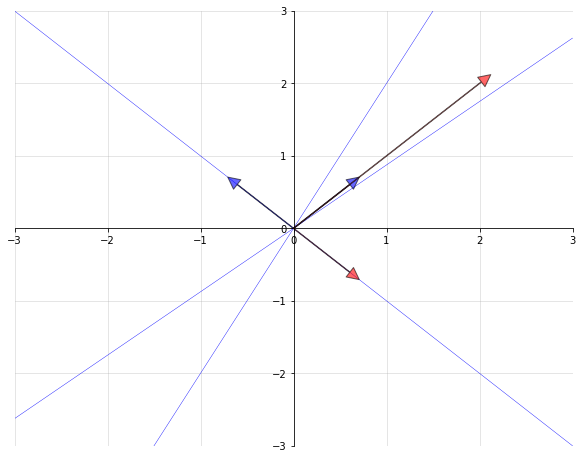

In [0]:
A = ((1,2), (2,1))
A= np.array(A)
evals,evecs=eig(A)
evecs= evecs[:,0],evecs[:,1]

fig, ax = plt.subplots(figsize=(10,8))
for spine in ['left', 'bottom']:
  ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
  ax.spines[spine].set_color('none')
ax.grid(alpha=0.4)

xmin, xmax = -3,3
ymin, ymax =-3,3

ax.set(xlim=(xmin,xmax),ylim=(ymin,ymax))

#plot each eigenvector
for v in evecs:
  ax.annotate('', xy=v, xytext=(0,0),
              arrowprops=dict(facecolor='blue',
                              shrink=0,
                              alpha=0.6,
                              width=0.5))
#plot the image of eigenvector
for v in evecs:
  v=A@v
  ax.annotate('', xy=v, xytext=(0,0),
              arrowprops=dict(facecolor='red',
                              shrink=0,
                              alpha=0.6,
                              width=0.5))

#plot the line they run through
x= np.linspace(xmin,xmax,3)
for v in vecs:
  a=v[1]/v[0]
  ax.plot(x,a*x,'b-', lw=0.4)

plt.show()